<a href="https://colab.research.google.com/github/Yousof-Mahmoud/MEDREC-Diabetes-prediction/blob/main/DiabetesPredectionModified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
diabetes_df = pd.read_csv('/content/diabetes2.csv')
diabetes_df.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


In [4]:
diabetes_df.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   Insulin        768 non-null    int64  
 3   BMI            768 non-null    float64
 4   Age            768 non-null    int64  
 5   Outcome        768 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 36.1 KB


In [6]:
diabetes_df.describe()


,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,33.240885,0.348958
std,31.972618,19.355807,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,24.000000,0.000000
50%,117.000000,72.000000,30.500000,32.000000,29.000000,0.000000
75%,140.250000,80.000000,127.250000,36.600000,41.000000,1.000000
max,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


In [7]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


In [8]:
diabetes_df.isnull().head(10)

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [9]:
diabetes_df.isnull().sum()

Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [11]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','Insulin','BMI']].replace(0,np.NaN)
# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Glucose            5
BloodPressure     35
Insulin          374
BMI               11
Age                0
Outcome            0
dtype: int64


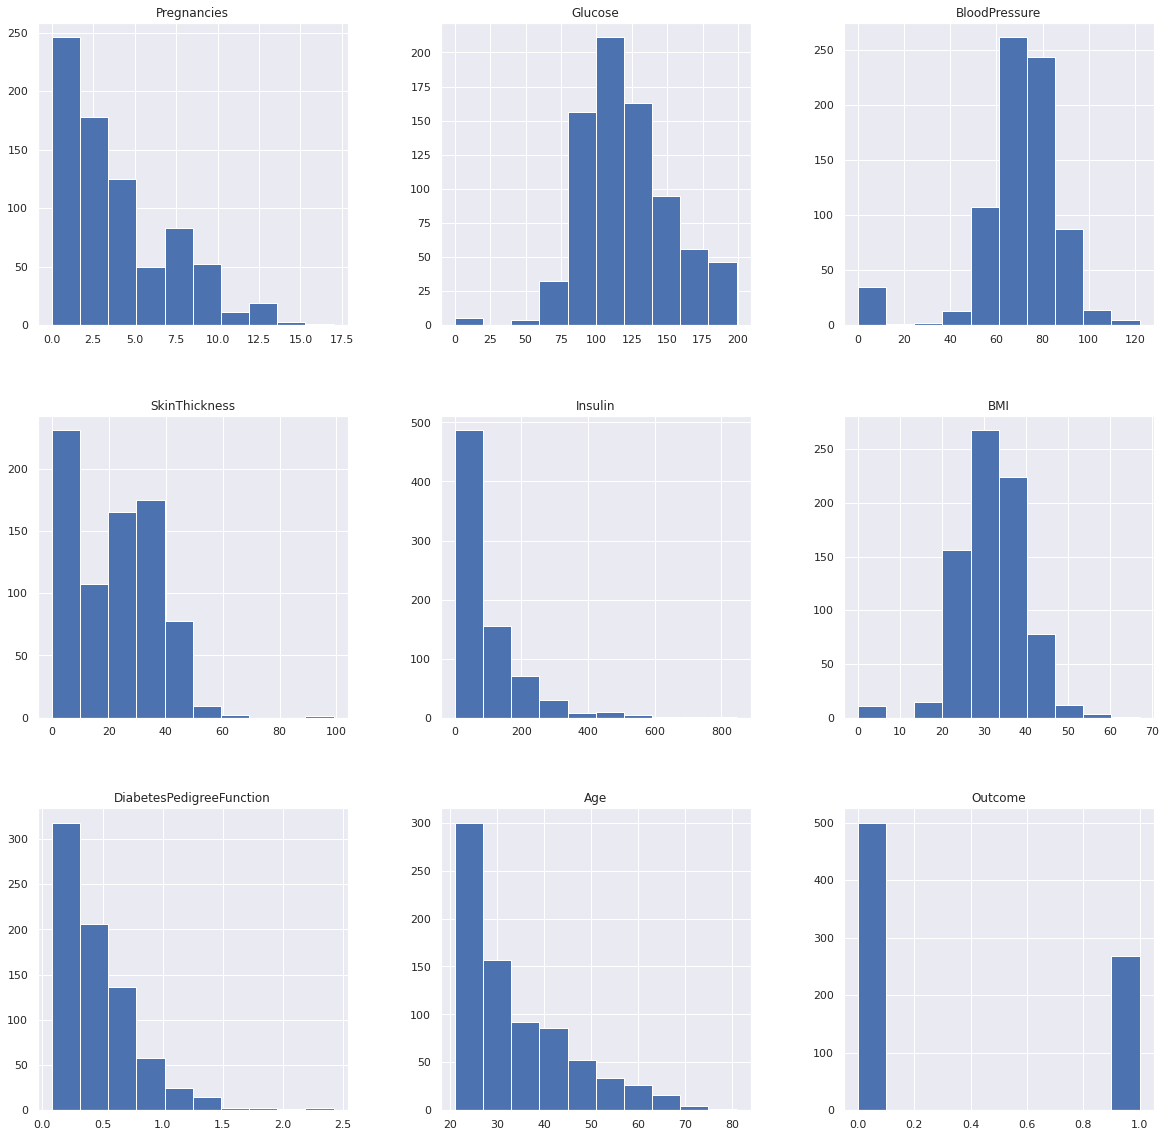

In [ ]:
p = diabetes_df.hist(figsize = (20,20))


In [12]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

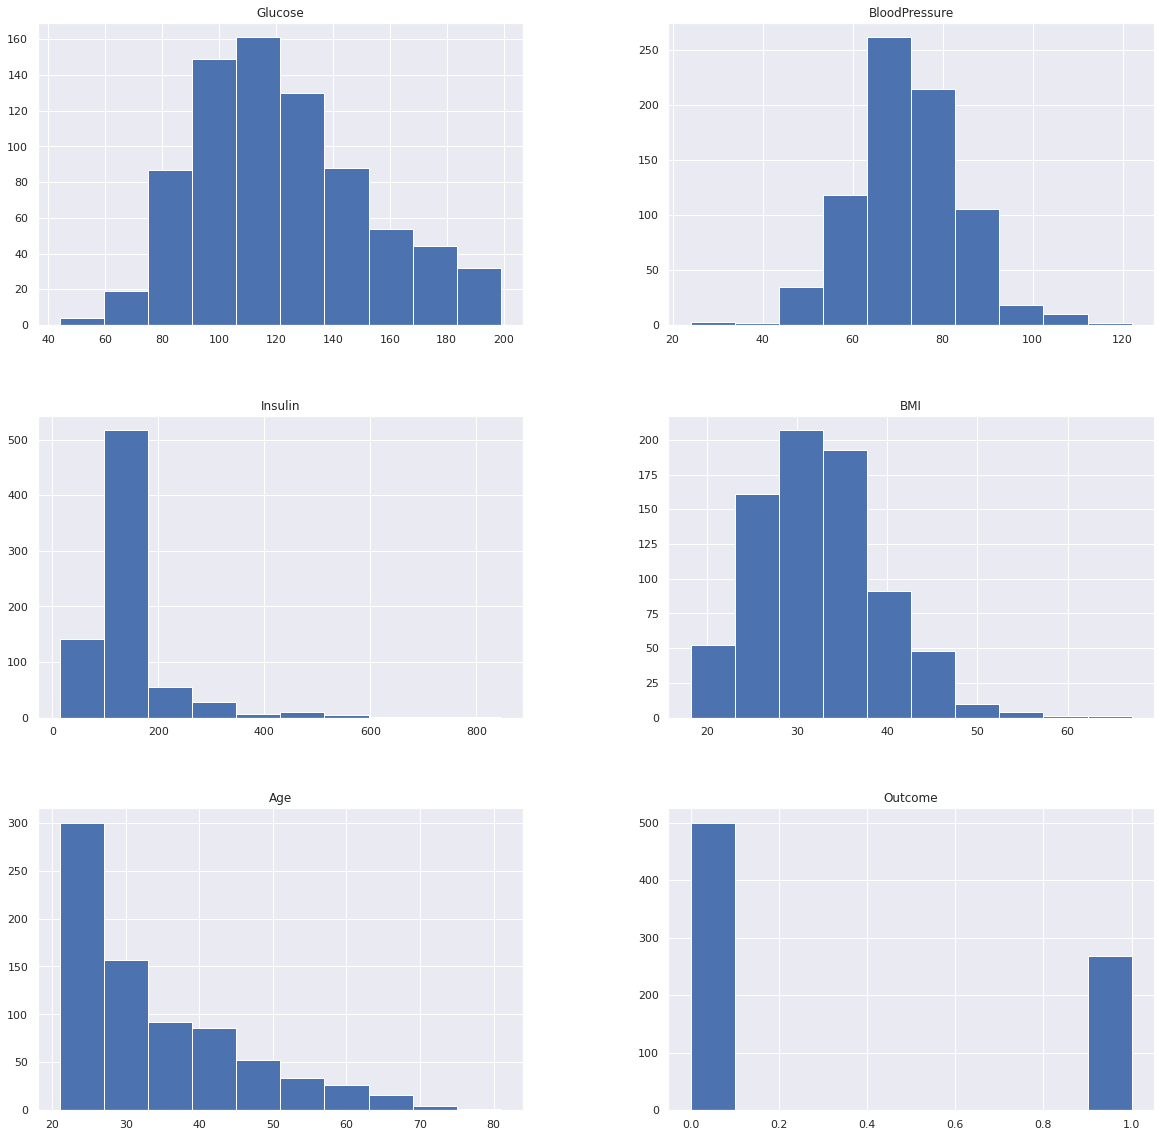

In [13]:
p = diabetes_df_copy.hist(figsize = (20,20))

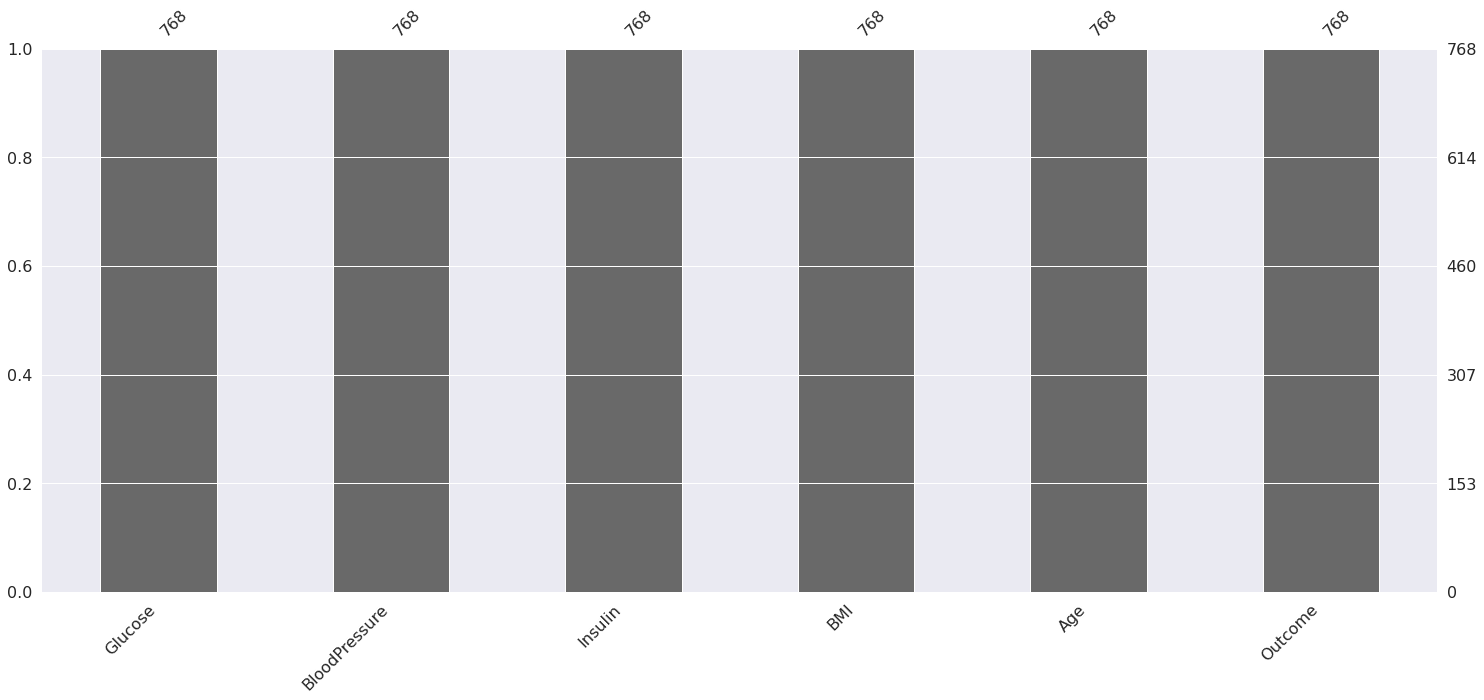

In [14]:
p = msno.bar(diabetes_df)

0    500
1    268
Name: Outcome, dtype: int64


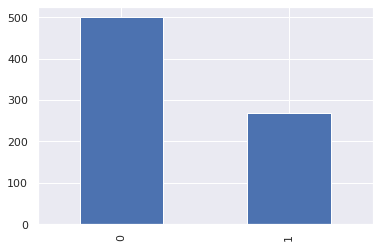

In [15]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

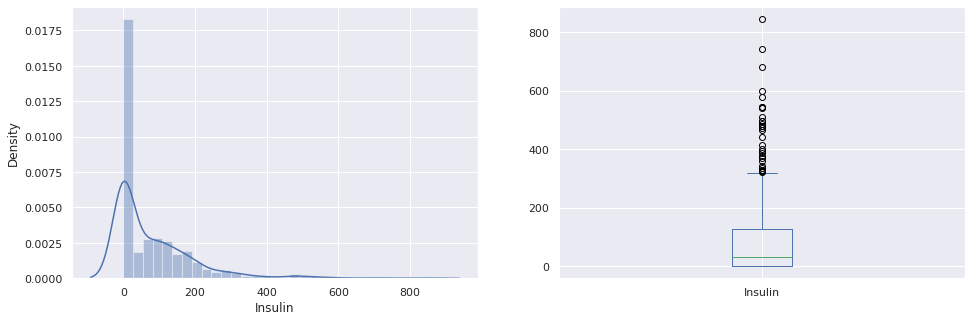

In [16]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

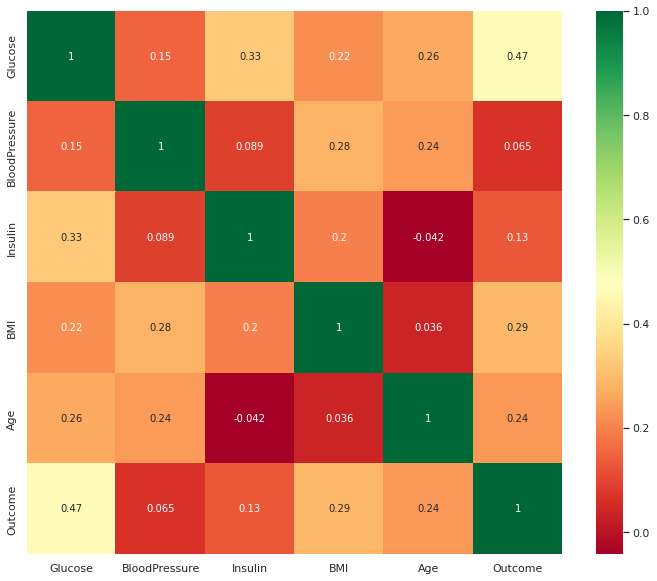

In [17]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [18]:
diabetes_df_copy.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148.0,72.0,125.0,33.6,50,1
1,85.0,66.0,125.0,26.6,31,0
2,183.0,64.0,125.0,23.3,32,1
3,89.0,66.0,94.0,28.1,21,0
4,137.0,40.0,168.0,43.1,33,1


In [20]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age'])
X.head()

,Glucose,BloodPressure,Insulin,BMI,Age
0,0.865108,-0.033518,-0.181541,0.166619,1.425995
1,-1.206162,-0.529859,-0.181541,-0.852200,-0.190672
2,2.015813,-0.695306,-0.181541,-1.332500,-0.105584
3,-1.074652,-0.529859,-0.540642,-0.633881,-1.041549
4,0.503458,-2.680669,0.316566,1.549303,-0.020496


In [21]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [26]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7244094488188977


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[130  32]
 [ 38  54]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       162
           1       0.63      0.59      0.61        92

    accuracy                           0.72       254
   macro avg       0.70      0.69      0.70       254
weighted avg       0.72      0.72      0.72       254



In [28]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7047244094488189


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[122  40]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       162
           1       0.59      0.62      0.60        92

    accuracy                           0.70       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.71      0.70      0.71       254



In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7125984251968503


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[124  38]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       162
           1       0.60      0.62      0.61        92

    accuracy                           0.71       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.71      0.71      0.71       254



In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [35]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7480314960629921


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[133  29]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       162
           1       0.66      0.62      0.64        92

    accuracy                           0.75       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.74      0.75      0.75       254



In [37]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [38]:
svc_pred = svc_model.predict(X_test)


In [39]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7401574803149606


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 49  43]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.81       162
           1       0.72      0.47      0.57        92

    accuracy                           0.74       254
   macro avg       0.73      0.68      0.69       254
weighted avg       0.74      0.74      0.72       254



In [41]:
rfc.feature_importances_

array([0.33237676, 0.125427  , 0.10967794, 0.23442494, 0.19809336])

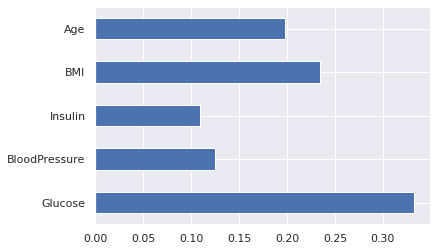

In [42]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))


In [43]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [44]:
diabetes_df.head()


,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


In [45]:
diabetes_df.tail()


,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
763,101,76,180,32.9,63,0
764,122,70,0,36.8,27,0
765,121,72,112,26.2,30,0
766,126,60,0,30.1,47,1
767,93,70,0,30.4,23,0


In [47]:
rfc.predict([[137,40,168,43.1,33]]) #4th patient


array([1])

In [48]:
rfc.predict([[101,76,180,32.9,63]])  # 763 th patient


array([0])